## ニューラルネットワーク
### 損失関数
ニューラルネットワークは「一つの指標」を手がかりに最適なパラメータを模索する
この関数には二乗和誤差や交差エントロピー誤差などが用いられる
ニューラルネットワークの性能の悪さ
損失関数をマイナスすると「どれだけ性能が悪くないか」を示すことになる

### 二乗和誤差
\begin{equation}
E = \frac {1}{2}\sum_{k} (y_k - t_k)^2
\end{equation}

In [44]:
import numpy as np
y = [0.1,0.05,0.6]
t = [0,0,1]
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)
a = mean_squared_error(np.array(y), np.array(t))
print(a)

# y,tの各要素の差→それぞれを2乗、結果を合計し、1/2する
b = 0.1**2
c = 0.05**2
d = (-0.4)**2
e = (b + c + d )*0.5
print(e)

0.08625000000000002
[ 0.01    0.0025  0.16  ]
0.1725
0.08625


### 交差エントロピー誤差
\begin{equation}
E = - \sum_{k} t_k log y_k
\end{equation}


In [46]:
import numpy as np
y = [0.1,0.05,0.6]
t = [0,1,0]
def cross_entropy_error(y, t):
    # np.log(0) は　-inf となってしまうため、微小な値を追加
    delta = 1e-7
    return - np.sum(t* np.log(y + delta))

a = cross_entropy_error(np.array(y), np.array((t)))
print(a)

2.99573027356


### 交差エントロピー誤差 ミニバッチ化
\begin{equation}
E = -\frac {1}{N} \sum_{n} \sum_{k} t_{nk} \log y_{nk}
\end{equation}

In [6]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

# (訓練画像、訓練ラベル)、（テスト画像、テストラベル）
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


#教師データがラベルとして与えられる one-hot表現ではなく、2や7が来る場合
# t* np.log(y + delta) →　np.log(y[np.arange(batch_size), t] + delta)とできる

def cross_entropy_error(y, t):
    if y.ndmi == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    # np.log(0) は　-inf となってしまうため、微小な値を追加
    delta = 1e-7
    return - np.sum(np.log(y[np.arange(batch_size), t] + delta)) /batch_size

# np.arange
# 0 から batch_size -1 までの配列を生成

(10, 784)


なぜ損失関数を設定するのか？
認識精度を指標にしてはいけない
パラメータの微分が0になってしまうから
ステップ関数の傾きは殆どの場所で0
シグモイド関数の傾き（接線）は0にならない

### 数値微分

#### 微分
\begin{equation}
\frac {df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} \\
\end{equation}

0.1999999999990898
0.2999999999986347
0.09999999999968368
0.1999999999996449


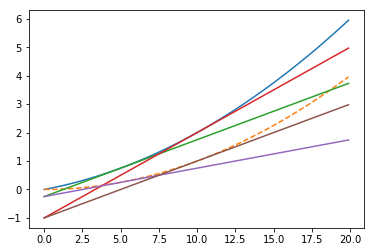

In [1]:
# BAD
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

# 10e-50 は小さすぎ　10e-4 くらいで良い
# 真の接線と近似による接線は誤差が生じる
# 誤差をへらす工夫として中心差分を用いる
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x -h)) / (2* h)

# 数値微分の例
def func_1(x):
    return 0.01*x**2 + 0.1*x

def func_2(x):
    return 0.01*x**2

import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1)
y1 = func_1(x)
y2 = func_2(x)
plt.plot(x, y1, label="step")
plt.plot(x, y2, linestyle="--", label="sigmoid")
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

tf1 = tangent_line(func_1, 5)
tf2 = tangent_line(func_1, 10)
tf3 = tangent_line(func_2, 5)
tf4 = tangent_line(func_2, 10)
y3= tf1(x)
plt.plot(x, y3)
y4= tf2(x)
plt.plot(x, y4)
y5= tf3(x)
plt.plot(x, y5)
y6= tf4(x)
plt.plot(x, y6)
plt.show()

### 偏微分
複数変数からなる関数の微分を偏微分という
また、すべての変数の偏微分をベクトルとしてまとめたものを勾配という

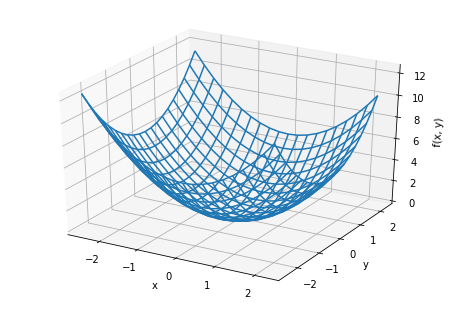

In [41]:
from mpl_toolkits.mplot3d import Axes3D
def func1(x, y):
    return x**2 + y**2

x = np.arange(-2.5, 2.5, 0.25)
y = np.arange(-2.5, 2.5, 0.25)
hoge = np.array([x,y])
X, Y = np.meshgrid(x, y)
Z = func1(X, Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.plot_wireframe(X, Y, Z)
plt.show()


In [1]:
# 勾配
x0 = np.arange(-2.5, 2.5, 0.25)
x1 = np.arange(-2.5, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 値を元に戻す

    return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad



grad = numerical_gradient(function_2, np.array([X, Y]).T).T

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])

plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

NameError: name 'np' is not defined

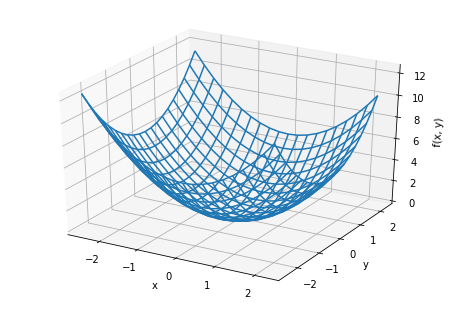